**YOLO를 이용하여 왼쪽 눈의 좌표, 오른쪽 눈의 좌표, 입의 좌표, 담배 유무, 휴대폰 유무 정보를 받아오기**

In [1]:
import sys
import torch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/jnalgae/CustomizedYOLOv5
%cd CustomizedYOLOv5

Cloning into 'CustomizedYOLOv5'...
remote: Enumerating objects: 11423, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 11423 (delta 42), reused 9 (delta 5), pack-reused 11350 (from 1)
Receiving objects: 100% (11423/11423), 13.34 MiB | 19.29 MiB/s, done.
Resolving deltas: 100% (7587/7587), done.
/content/CustomizedYOLOv5


YOLOv5 모델이 추론한 결과를 받아온다.
- is_cigar: 담배 유/무
- is_phone: 휴대폰 유/무
- leye_coord: 왼쪽 눈의 좌상단 (x, y), 우하단 (x, y) 좌표
- reye_coord: 오른쪽 눈의 좌상단 (x, y), 우하단 (x, y) 좌표
- mouth_coord: 입의 좌상단 (x, y), 우하단 (x, y) 좌표

In [12]:
import importlib
import detect
from detect import run
# importlib.reload(detect)

def img_detect(source_path, img_size=(480, 480), save_txt=True, save_conf=True, weights_path="/content/drive/MyDrive/CAB/CAB_dataset/model/best_YOLO_model.pt",):
  return run(weights=weights_path, imgsz=img_size, source=source_path, save_txt=save_txt, save_conf=save_conf, conf_thres=0.40)

In [17]:
"""
is_cigar, is_phone, leye_coord, reye_coord, mouth_coord = img_detect("/content/drive/MyDrive/CAB/CAB_dataset/test_no_txt/240_G3_37_좌측광원_룸미러_하품재현_20201119_215235_02283.jpg")

print(is_cigar, is_phone, leye_coord, reye_coord, mouth_coord)
"""

'\nis_cigar, is_phone, leye_coord, reye_coord, mouth_coord = img_detect("/content/drive/MyDrive/CAB/CAB_dataset/test_no_txt/240_G3_37_좌측광원_룸미러_하품재현_20201119_215235_02283.jpg")\n\nprint(is_cigar, is_phone, leye_coord, reye_coord, mouth_coord)\n'

YOLO의 추론 결과를 확인할 수 있는 함수이다.

위에서 추론한 담배의 유무(False), 휴대폰의 유무(False)처럼 해당 이미지에는 담배와 휴대폰이 없다.

In [6]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2] # image.shape = (높이, 너비, 채널 )
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC) # 이미지 3배 확대

  fig = plt.gcf() # matplotlib figure 객체 생성
  fig.set_size_inches(18, 10) # figure 크기 가로 18인치, 세로 10인치로 설정
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)) # figure에 표시
  plt.show()

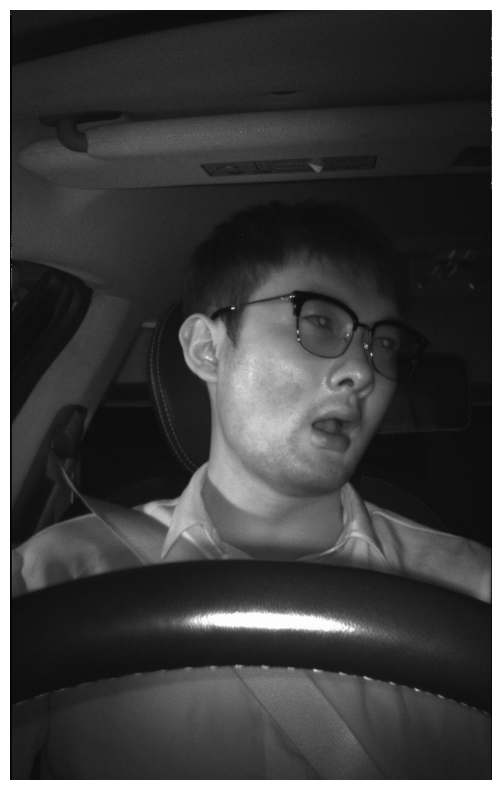

In [18]:
# imShow("/content/drive/MyDrive/CAB/CAB_dataset/test_no_txt/240_G3_37_좌측광원_룸미러_하품재현_20201119_215235_02283.jpg")